In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

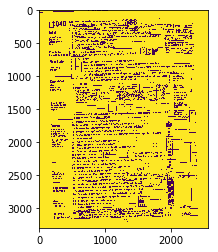

In [2]:
%matplotlib inline
img = cv2.imread("../resources/r0000_00.png",0)
plt.imshow(img)

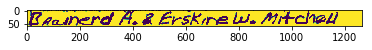

In [3]:
img_1 = cv2.imread("../resources/fio.png",0)
plt.imshow(img_1)

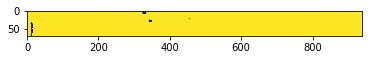

In [4]:
img_2 = cv2.imread("../resources/empty.png",0)
plt.imshow(img_2)

In [5]:
def calc_image(img):
    """
    Функция возвращает процент чернил в картинке
    """
    thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    count_of_pixel = np.count_nonzero(thresholded)
    percent = 100 * np.count_nonzero(thresholded) / (img.shape[0] * img.shape[1])

    return percent

def is_signature(img, threshold=5):
    """
    Проверяем есть ли подпись в ``img``
    :param threshold: порог, при котором мы считаем, что подпись есть
    :param img: вырезанное изображение подписи
    :return: true/false
    """
    percent = calc_image(img)
    return percent > threshold, round(percent, 3)

In [6]:
#проверяем пустое поле
is_signature(img_2)

(False, 0.536)

In [7]:
#проверяем поле с подписью
is_signature(img_1)

(True, 25.97)